In [1]:
'''random forest on 5050'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib

# Load Data
df = pd.read_csv("fiftyfifty.csv")

# Define Features and Target
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Save Model and Scaler
joblib.dump(model, "diabetes_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      7070
         1.0       0.72      0.77      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

ROC-AUC Score: 0.812255133926383


['scaler.pkl']

Anomaly Counts:
is_outlier
False    116603
True      47841
Name: count, dtype: int64

Identified Anomalies (first 5 rows):
    HighBP  HighChol  BMI  HeartDiseaseorAttack  Veggies  NoDocbcCost  \
1        1         1   24                     0        1            0   
3        1         1   25                     0        1            0   
6        1         1   28                     0        1            0   
11       1         1   28                     1        1            0   
13       1         0   33                     0        1            0   

    GenHlth  MentHlth  PhysHlth  DiffWalk  Age  Education  Income  anomaly  \
1         2         3         0         0   11          5       4       -1   
3         3         0         0         1   11          4       4       -1   
6         4         0         0         1   11          4       6       -1   
11        4         0         0         0   12          2       4       -1   
13        1         0         0         1   13  

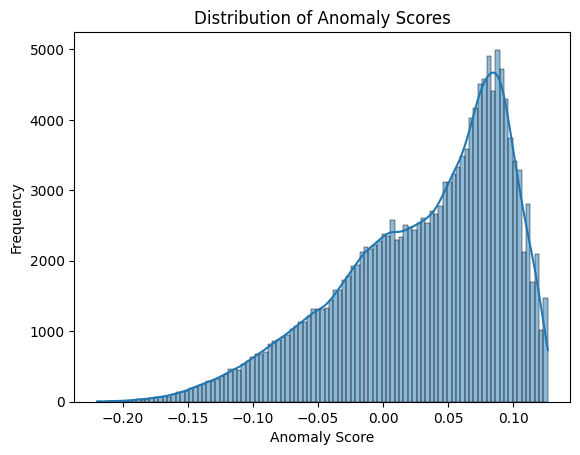


Target variable distribution for anomalies:
Diabetes_012
0    0.811187
2    0.167095
1    0.021718
Name: proportion, dtype: float64


In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/cleaned_diabetes.csv")
)
# Target is the first column ('Diabetes_012')
y = df.iloc[:, 0].values

# Features are the remaining columns (starting from the second)
X = df.iloc[:, 1:].values

# Initialize and train the Isolation Forest model on the features (X)
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X)

# Predict anomalies on the feature data (X)
anomaly_predictions = model.predict(X)

# Get anomaly scores
anomaly_scores = model.decision_function(X)

# Add anomaly predictions and scores to a DataFrame 
anomaly_df = pd.DataFrame(X, columns=df.columns[1:]) # Create a DataFrame with feature names
anomaly_df['anomaly'] = anomaly_predictions
anomaly_df['anomaly_score'] = anomaly_scores
anomaly_df['is_outlier'] = anomaly_df['anomaly'].apply(lambda x: True if x == -1 else False)

#  Analyze the results
print("Anomaly Counts:")
print(anomaly_df['is_outlier'].value_counts())

anomalies = anomaly_df[anomaly_df['is_outlier']]
print("\nIdentified Anomalies (first 5 rows):")
print(anomalies.head())

# Visualize anomaly scores
sns.histplot(anomaly_df['anomaly_score'], kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Further analysis: Look at the target variable ('Diabetes_012')
# for the identified anomalies to see if there's any correlation.
# Merge with the original DataFrame to access the target variable
merged_df = pd.concat([df, anomaly_df[['anomaly', 'anomaly_score', 'is_outlier']]], axis=1)

print("\nTarget variable distribution for anomalies:")
print(merged_df[merged_df['is_outlier']]['Diabetes_012'].value_counts(normalize=True))


--- Evaluation based on Anomaly Detection vs. Diabetes Label ---
Assuming 'non-zero' in 'Diabetes_012' as the 'anomaly' class.
Threshold for anomaly: -0.15
Accuracy-like score: 0.8783

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    144834
           1       0.30      0.02      0.03     19610

    accuracy                           0.88    164444
   macro avg       0.59      0.51      0.48    164444
weighted avg       0.81      0.88      0.83    164444


Confusion Matrix:


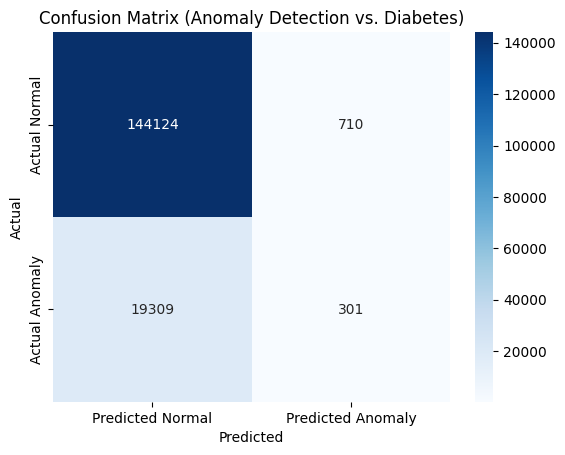


--- Evaluation assuming '0' in 'Diabetes_012' as the 'anomaly' class ---
Accuracy-like score: 0.8783

Classification Report:
              precision    recall  f1-score   support

       False       0.30      0.02      0.03     19610
        True       0.88      1.00      0.94    144834

    accuracy                           0.88    164444
   macro avg       0.59      0.51      0.48    164444
weighted avg       0.81      0.88      0.83    164444


Confusion Matrix:


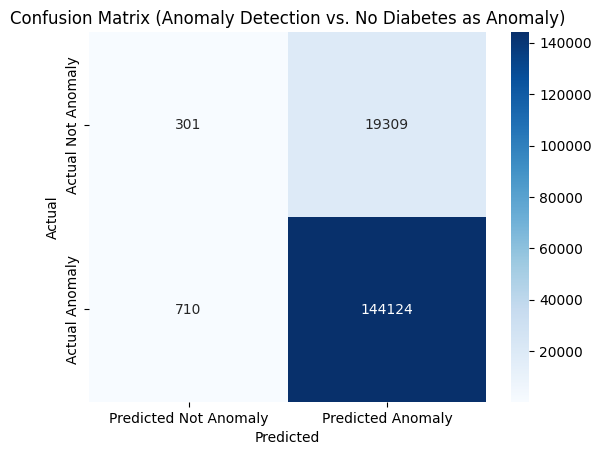

In [4]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/cleaned_diabetes.csv")

# Separate features (X) and target (y)
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)

# Initialize and train the Isolation Forest model on the features (X)
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X)

# Get anomaly scores
anomaly_scores = model.decision_function(X)


threshold = -0.15  
anomaly_predictions_threshold = np.where(anomaly_scores < threshold, 1, 0) # 1 for anomaly, 0 for inlier

binary_diabetes = y.apply(lambda x: 1 if x != 0 else 0)

# Evaluate the "performance" based on this interpretation
print("\n--- Evaluation based on Anomaly Detection vs. Diabetes Label ---")
print("Assuming 'non-zero' in 'Diabetes_012' as the 'anomaly' class.")
print(f"Threshold for anomaly: {threshold}")
print(f"Accuracy-like score: {accuracy_score(binary_diabetes, anomaly_predictions_threshold):.4f}")
print("\nClassification Report:")
print(classification_report(binary_diabetes, anomaly_predictions_threshold))
print("\nConfusion Matrix:")
cm = confusion_matrix(binary_diabetes, anomaly_predictions_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Anomaly'],
            yticklabels=['Actual Normal', 'Actual Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Anomaly Detection vs. Diabetes)')
plt.show()

print("\n--- Evaluation assuming '0' in 'Diabetes_012' as the 'anomaly' class ---")
anomaly_predictions_threshold_inverted = np.where(anomaly_scores < threshold, 0, 1) # Invert the anomaly prediction
print(f"Accuracy-like score: {accuracy_score(y == 0, anomaly_predictions_threshold_inverted):.4f}")
print("\nClassification Report:")
print(classification_report(y == 0, anomaly_predictions_threshold_inverted))
print("\nConfusion Matrix:")
cm_inverted = confusion_matrix(y == 0, anomaly_predictions_threshold_inverted)
sns.heatmap(cm_inverted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Anomaly', 'Predicted Anomaly'],
            yticklabels=['Actual Not Anomaly', 'Actual Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Anomaly Detection vs. No Diabetes as Anomaly)')
plt.show()


--- Evaluation based on Anomaly Detection vs. Diabetes Label ---
Assuming 'non-zero' in 'Diabetes_012' as the 'anomaly' class.
Threshold for anomaly: -0.15
Accuracy-like score: 0.5010

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     35346
           1       0.66      0.00      0.01     35346

    accuracy                           0.50     70692
   macro avg       0.58      0.50      0.34     70692
weighted avg       0.58      0.50      0.34     70692


Confusion Matrix:


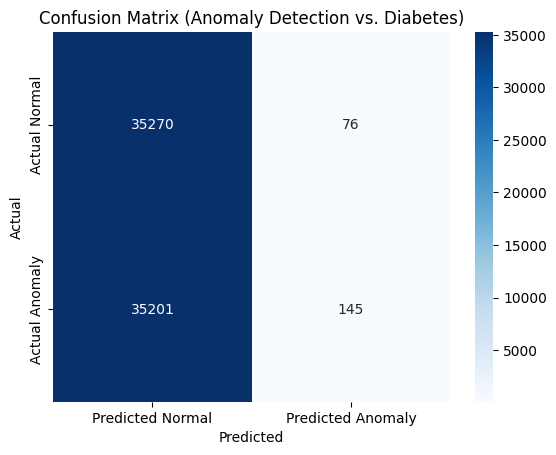


--- Evaluation assuming '0' in 'Diabetes_012' as the 'anomaly' class ---
Accuracy-like score: 0.5010

Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.00      0.01     35346
        True       0.50      1.00      0.67     35346

    accuracy                           0.50     70692
   macro avg       0.58      0.50      0.34     70692
weighted avg       0.58      0.50      0.34     70692


Confusion Matrix:


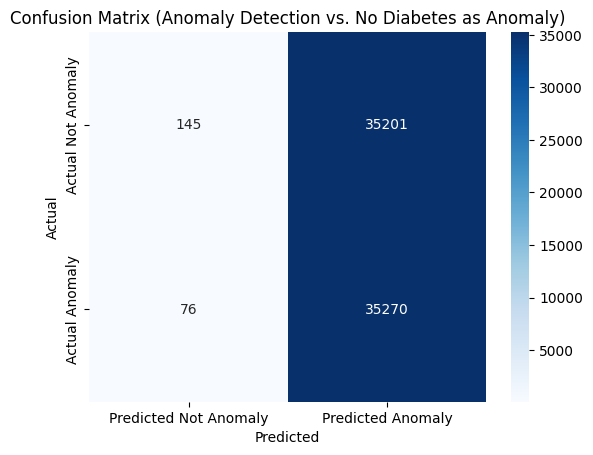

In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("C:/Users/ayush/ecs171/TeamProject/BMIClassGege.csv")

# Separate features (X) and target (y)
y = df['Diabetes_binary']
X = df.drop('Diabetes_binary', axis=1)

# Initialize and train the Isolation Forest model on the features (X)
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X)

# Get anomaly scores
anomaly_scores = model.decision_function(X)

threshold = -0.15  

anomaly_predictions_threshold = np.where(anomaly_scores < threshold, 1, 0) # 1 for anomaly, 0 for inlier

# We can treat '1' (or '2' if present) in 'Diabetes_012' as the "anomalous" class
# and '0' as the "normal" class for this evaluation.

binary_diabetes = y.apply(lambda x: 1 if x != 0 else 0)

# 8. Evaluate the "performance" based on this interpretation
print("\n--- Evaluation based on Anomaly Detection vs. Diabetes Label ---")
print("Assuming 'non-zero' in 'Diabetes_012' as the 'anomaly' class.")
print(f"Threshold for anomaly: {threshold}")
print(f"Accuracy-like score: {accuracy_score(binary_diabetes, anomaly_predictions_threshold):.4f}")
print("\nClassification Report:")
print(classification_report(binary_diabetes, anomaly_predictions_threshold))
print("\nConfusion Matrix:")
cm = confusion_matrix(binary_diabetes, anomaly_predictions_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Anomaly'],
            yticklabels=['Actual Normal', 'Actual Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Anomaly Detection vs. Diabetes)')
plt.show()

print("\n--- Evaluation assuming '0' in 'Diabetes_012' as the 'anomaly' class ---")
anomaly_predictions_threshold_inverted = np.where(anomaly_scores < threshold, 0, 1) # Invert the anomaly prediction
print(f"Accuracy-like score: {accuracy_score(y == 0, anomaly_predictions_threshold_inverted):.4f}")
print("\nClassification Report:")
print(classification_report(y == 0, anomaly_predictions_threshold_inverted))
print("\nConfusion Matrix:")
cm_inverted = confusion_matrix(y == 0, anomaly_predictions_threshold_inverted)
sns.heatmap(cm_inverted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Anomaly', 'Predicted Anomaly'],
            yticklabels=['Actual Not Anomaly', 'Actual Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Anomaly Detection vs. No Diabetes as Anomaly)')
plt.show()